# Tone Notebook

In [1]:
import pitch_process as pp
import utils

from curses import window
from encodings import normalize_encoding
from locale import normalize
import math
from cmath import log
from random import uniform
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[124.76575495 123.91480706 122.50460362 120.82200319 119.01484854
 117.10756061 115.36196429 111.82044521 108.55132312 107.76193356]


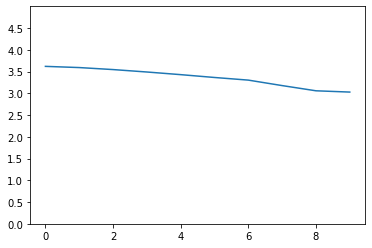

In [2]:

# def main():
# pyin - F0 estimate
filename = 'data/Zh-tā.ogg.mp3'
y, sr = librosa.load(filename)
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)
# print(voiced_flag)
# print(voiced_probs)
# times = librosa.times_like(f0)
# handle creaky voice somewhere here
voiced = pp.voice_activity(f0, voiced_flag)
smoothed_f0 = pp.moving_average(voiced)
# smoothed_f0 = voice_activity(f0, voiced_flag)
max_f0 = pp.get_max_f0(voiced)
min_f0 = pp.get_min_f0(voiced)
normalized_values = pp.normalize_pitch(smoothed_f0, max_f0, min_f0)
# print(normalized_values)
print(smoothed_f0)
ax = plt.gca()
ax.set_ylim([0, 5])
plt.yticks(np.arange(0, 5, 0.5))
plt.plot(normalized_values)
plt.show()
# plt.savefig('normalize6.png')


## Tone 1 Analysis

/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.9/site-packages/librosa/cor

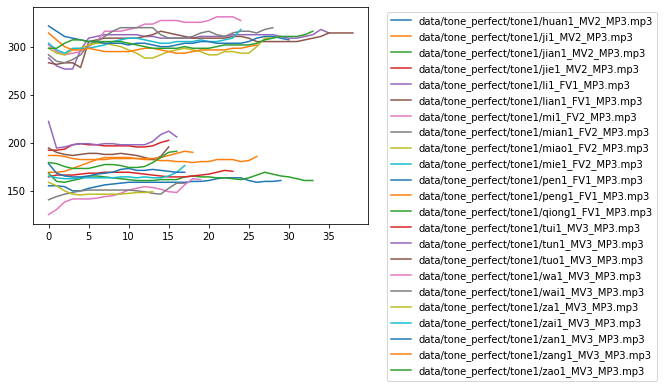

In [5]:
# load audio files for tone 1
TONE1_FOLDER = 'data/tone_perfect/tone1'
tone1_files = utils.get_audiofiles(TONE1_FOLDER)

pitch_tracks = []

for file in tone1_files:
    y, sr = librosa.load(file)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    voiced = pp.voice_activity(f0, voiced_flag)
    plt.plot(voiced, label=file)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('LMAO_RIP.png')
plt.show()
    